In [1]:
%load_ext autoreload
%autoreload 2
from paper import *

In [2]:
links = np.load("data/links.npy")

In [3]:
N = len(links)
num_rep = 100
kappa = 0.6
T = 10000
a = 100
b = 500
initials = np.random.randint(0, 2, (num_rep, N), dtype=np.uint8)
intervals = np.stack([np.ones(100) * a, np.ones(100) * b], axis=1).astype(np.uint8)
delta = 4

In [4]:
C = get_mean_C_fast(links, initials, num_rep, intervals, delta, kappa)

100%|██████████| 100/100 [04:14<00:00,  2.54s/it]


In [5]:
C = get_mean_C(links, initials, num_rep, intervals, delta, kappa)


 94%|█████████▍| 94/100 [03:59<00:15,  2.54s/it]


KeyboardInterrupt: 

In [2]:
import numpy as np

In [12]:
a = np.arange(1, 10).reshape((3, 3))

In [13]:
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [14]:
b = np.array([100, 10, 1])

In [15]:
print(a@b)

[123 456 789]


In [21]:
print(np.sum(a * b, axis=1))

[123 456 789]


In [22]:
a = np.array([1, 2, 3, 4])
b = np.array([2, 3, 2, 3])
print(a ** b)

[ 1  8  9 64]


In [26]:
v = np.random.uniform(0, 1, 10)
r = np.ones(10) * 0.5
print(np.round(v, 2))
# print(r)
print(np.where(v<r, 1, 0))

[0.8  0.35 0.44 0.67 0.48 0.48 0.94 0.73 0.95 0.24]
[0 1 1 0 1 1 0 0 0 1]


C:\Users\gooog\AppData\Local\Temp\ipykernel_16296\310094824.py:5: RuntimeWarning: divide by zero encountered in power
  plt.plot(a, a ** -gamma, label=gamma)


<function matplotlib.pyplot.show(close=None, block=None)>

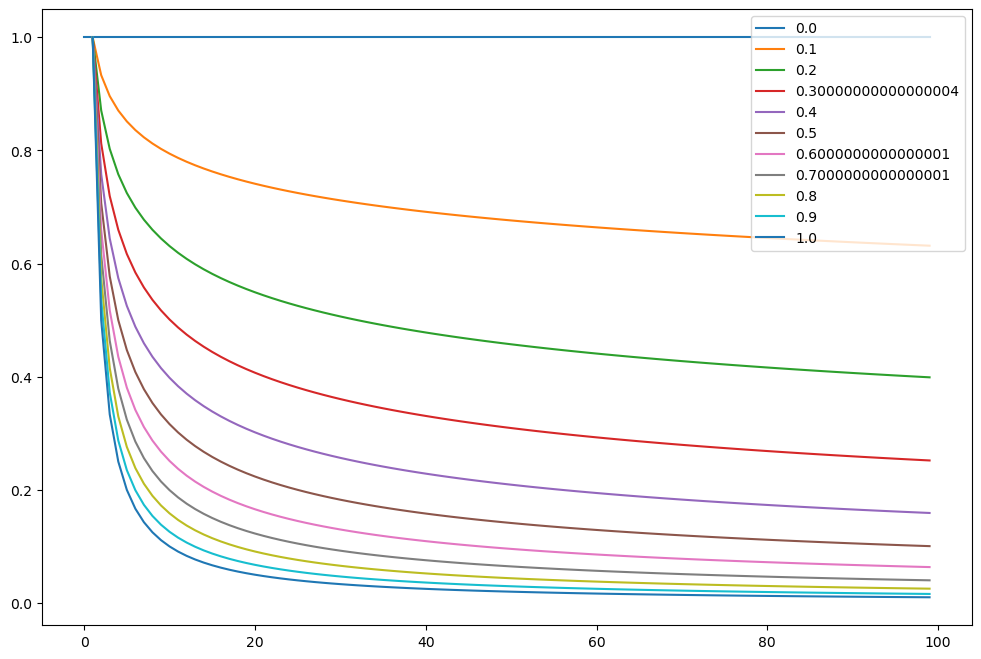

In [5]:
import matplotlib.pyplot as plt
a = np.arange(100)
plt.figure(figsize=(12, 8))
for gamma in np.arange(0, 1.1, 0.1):
    plt.plot(a, a ** -gamma, label=gamma)
plt.legend()
plt.show

In [7]:
a = np.ones(10)
print(np.all(a == 1))

True


In [45]:
import numpy as np
import matplotlib.pyplot as plt
def power_law(x, gamma, a):
    return a * x ** -gamma
def expo(x, gamma, a):
    return np.round(a * np.exp(-gamma * x))


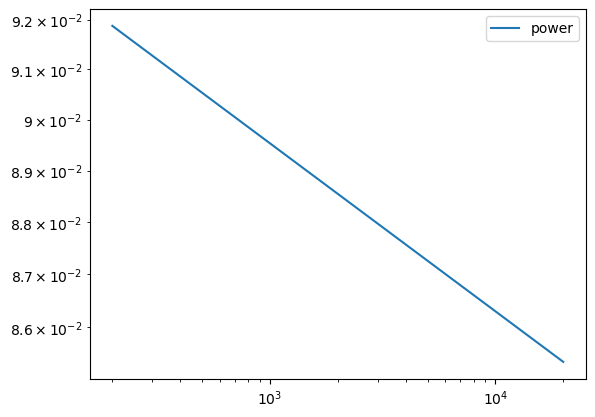

In [49]:
gamma = 0.016
a = 0.1
x = np.arange(200, 20001, 1)
plt.loglog(x, power_law(x, gamma, a), label="power")
# plt.loglog(x, expo(x, gamma, a), label="expo")
plt.legend()
plt.show()

In [1]:
from paper import *

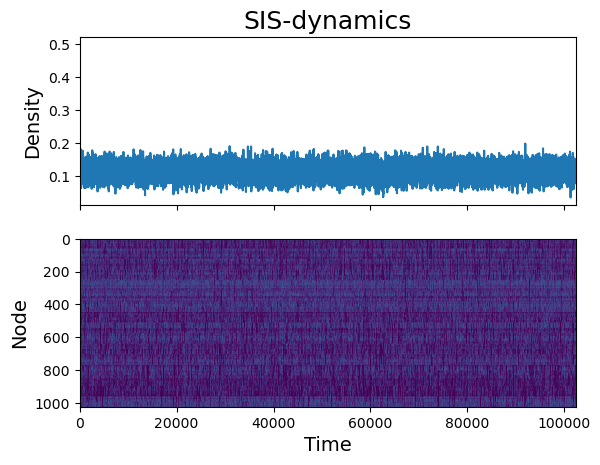

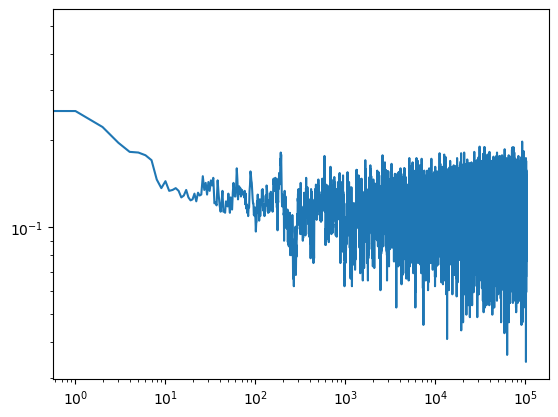

In [9]:
links = get_HMN(4, 8, 2.5)
initials = np.random.randint(0, 2, len(links), dtype=np.uint8)
T = 100 * len(links)
kappa = 0.1525#23

data = run_dynamics(links, initials, T, kappa)
plot_dynamics(data)

density = np.mean(data, axis=1)
plt.loglog(density)
plt.show()

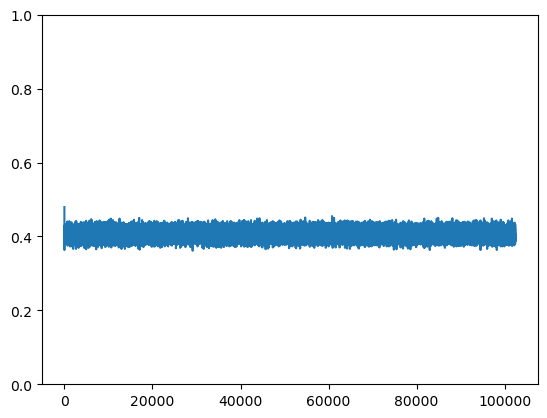

In [7]:
plt.plot(density)
plt.ylim(0.0, 1.0)
plt.show()

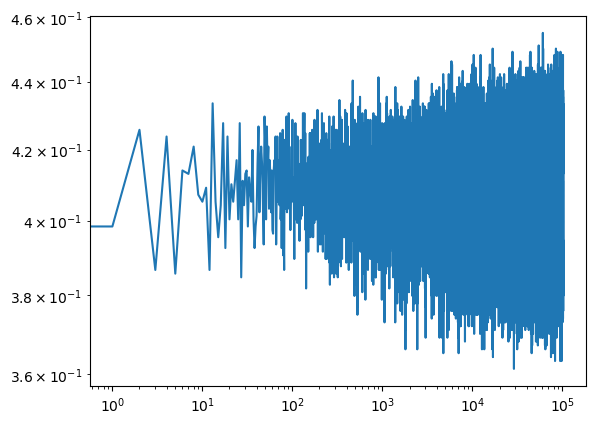

In [8]:
plt.loglog(density[200:])
plt.show()

In [8]:
def power_law(x, gamma, a):
    return np.abs(a) * x ** - np.abs(gamma)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

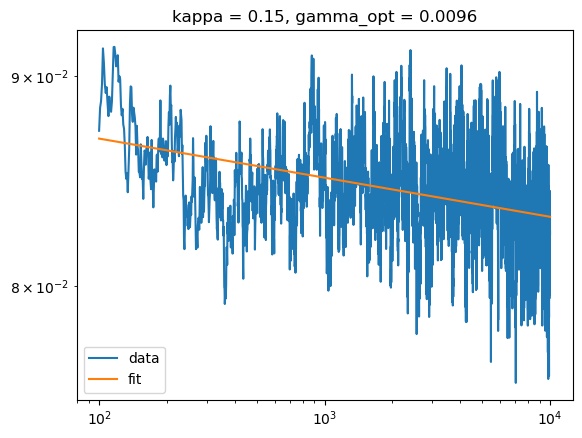

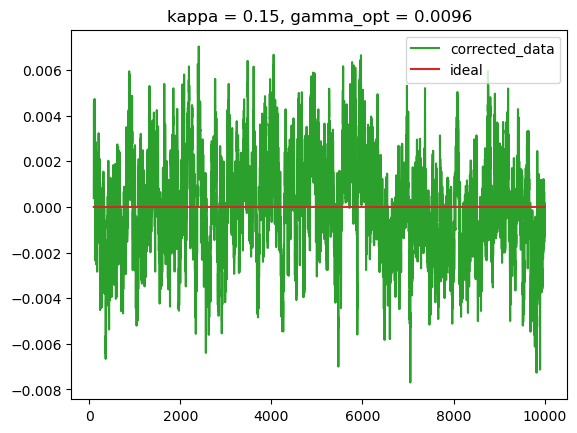

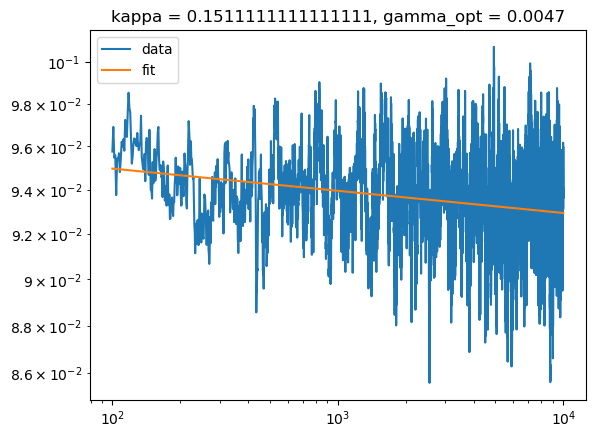

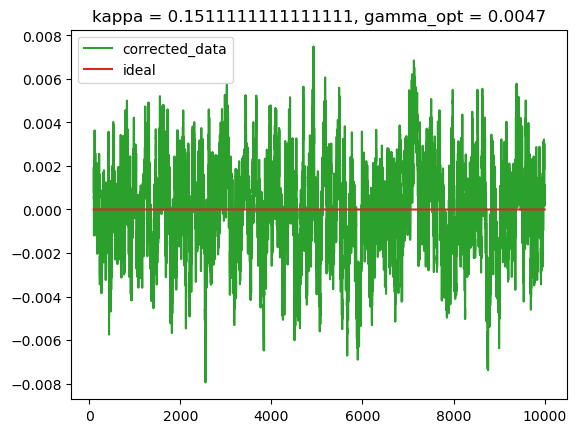

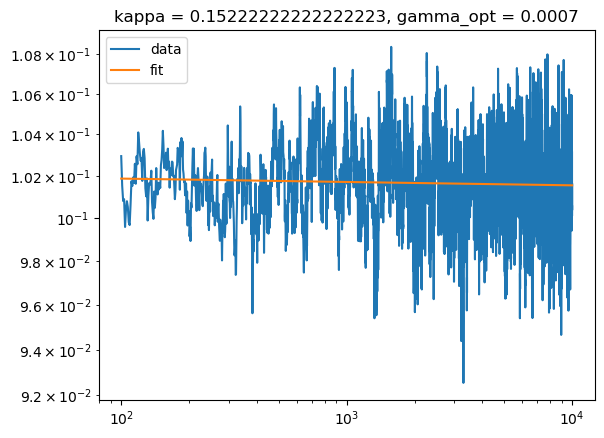

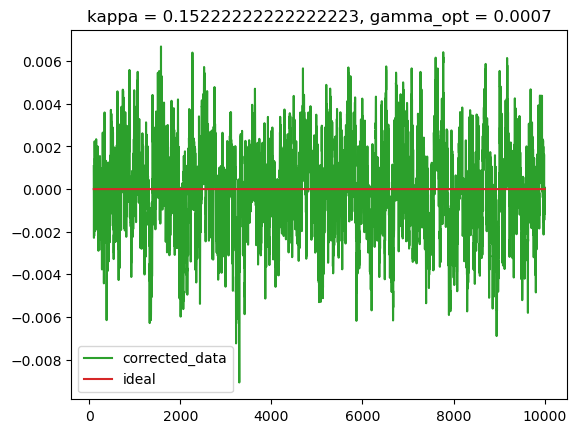

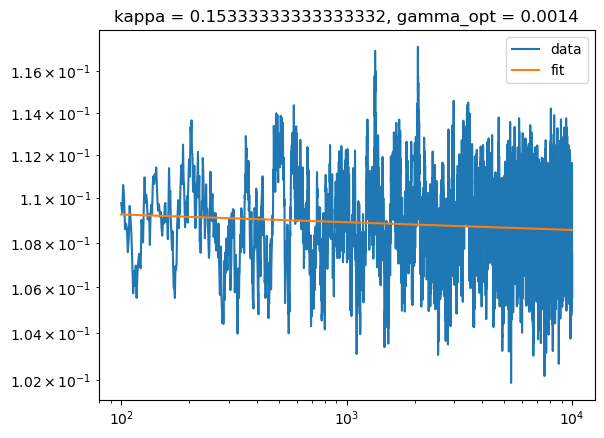

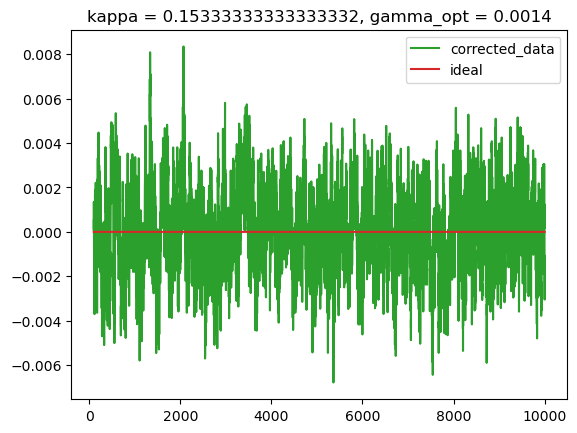

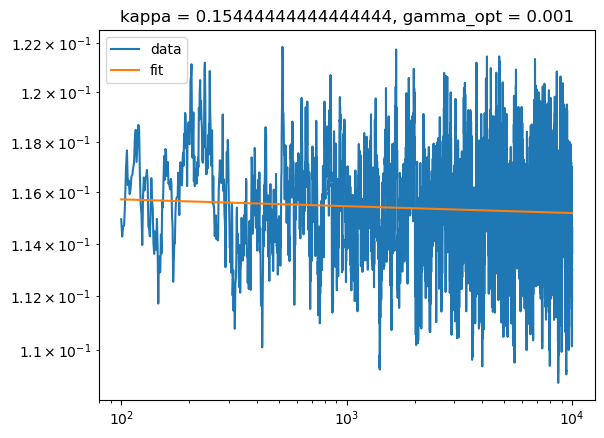

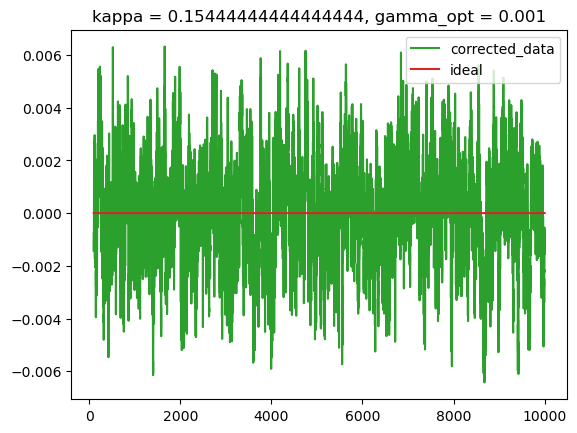

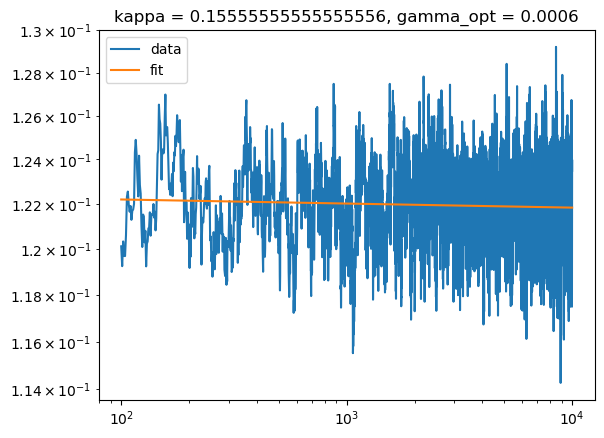

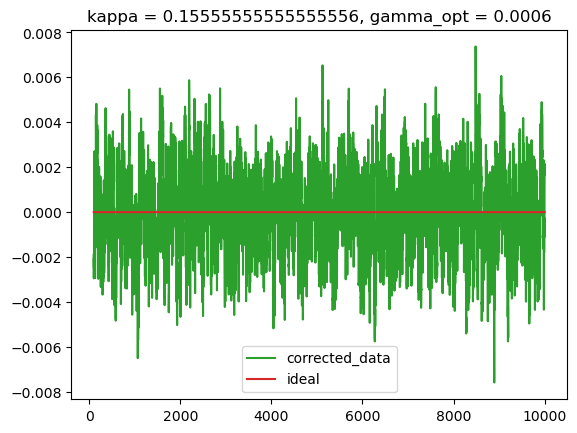

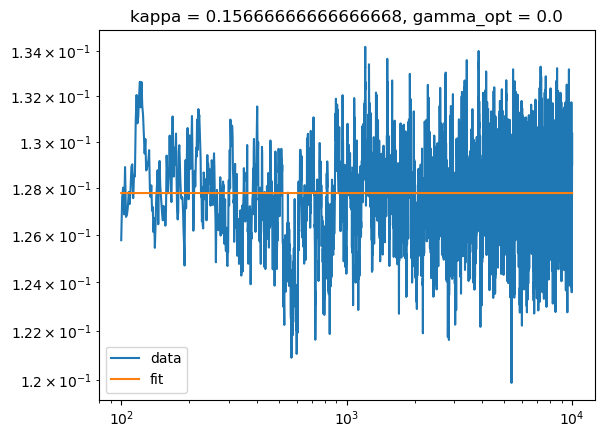

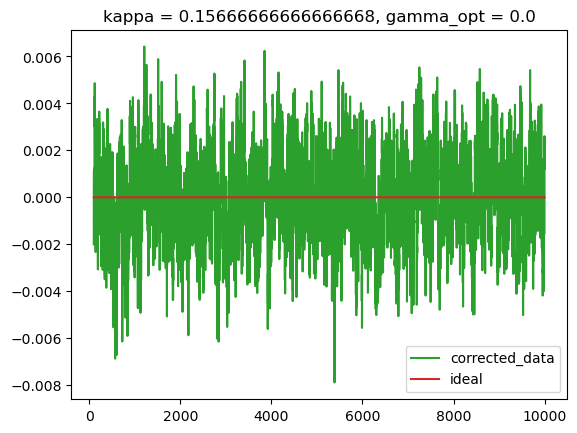

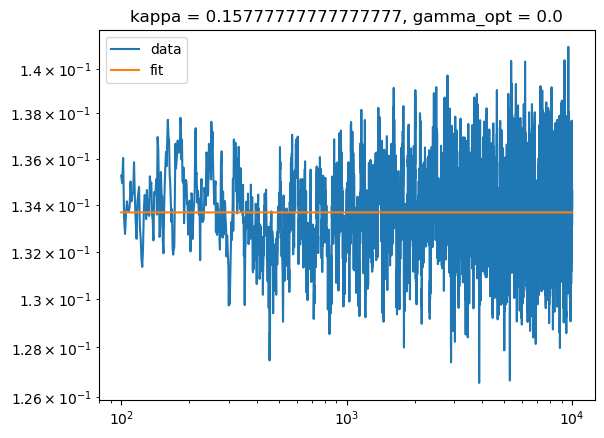

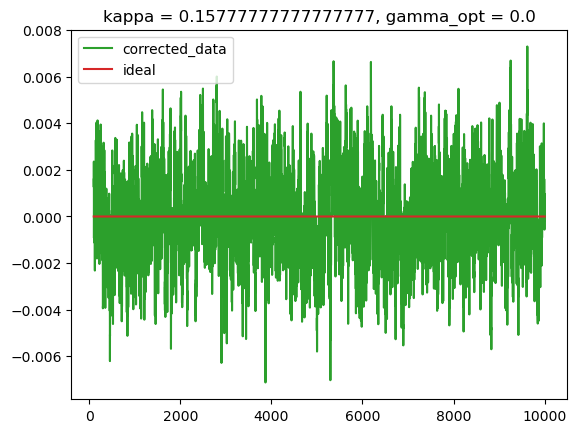

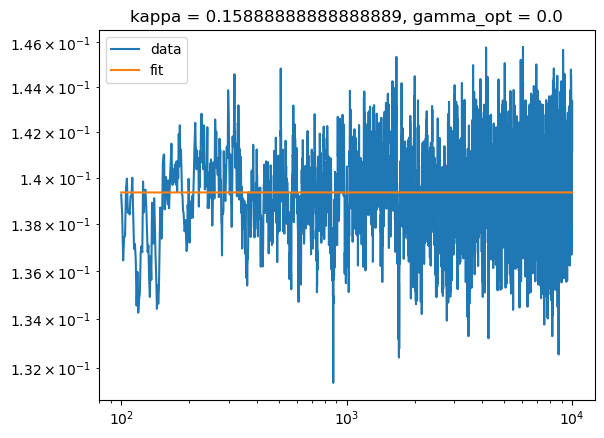

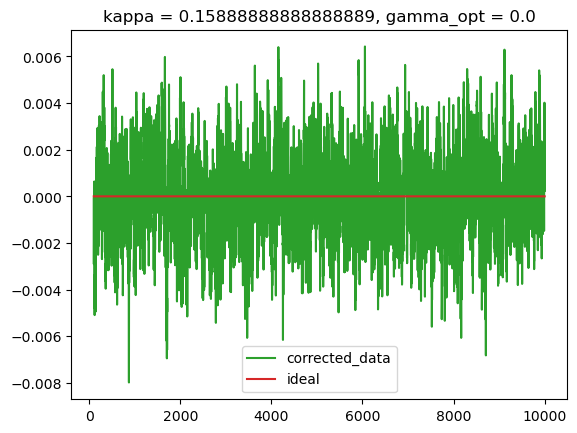

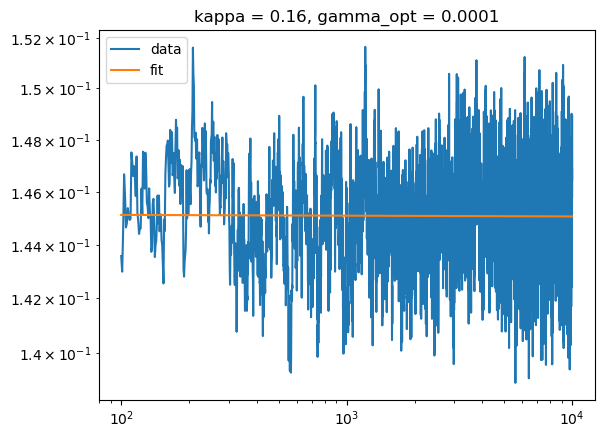

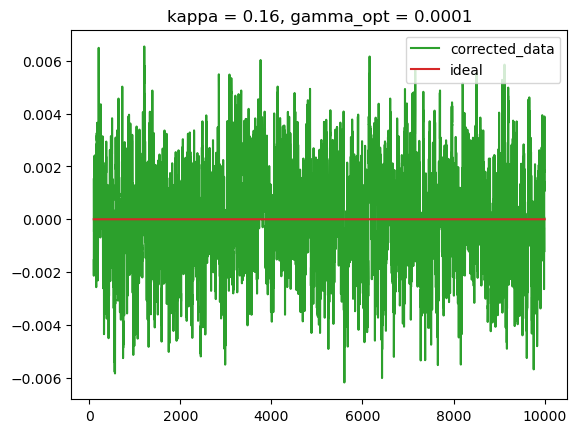

In [15]:
x = np.arange(100, 10001, 1)
for i in range(10):
    with open(f"results/exp_0/kappa_{i}.txt", "r") as f:
        line = f.readline().split(" ")
        kappa = float(line[1])
    density = np.loadtxt(f"results/exp_0/density_{i}.txt")
    popt, pcov = curve_fit(power_law, x, density[100:])
    popt = np.abs(popt)
    # plt.plot(density)
    # plt.title(f"Kappa = {kappa}")
    # plt.show()
    plt.loglog(x, density[100:], label="data")
    plt.loglog(x, power_law(x, *popt), label="fit")
    plt.title(f"kappa = {kappa}, gamma_opt = {np.round(popt[0], 4)}")
    plt.legend()
    plt.show()
    plt.plot(x, density[100:] - power_law(x, *popt), label="corrected_data", color="C2")
    plt.plot(x, np.zeros(len(density[100:])), label="ideal", color="C3")
    plt.title(f"kappa = {kappa}, gamma_opt = {np.round(popt[0], 4)}")
    plt.legend()
    plt.show()